# PCA on Toy Data

We will see what PCA does with data sampled from a 2-dimensional Gaussian with a non-diagonal covariance matrix.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (8,8)

In [3]:
def format_plot():
    plt.axis('square')
    plt.ylim([-4,4])
    plt.xlim([-4,4])
    
    plt.axhline(0, color='black', zorder=0, linestyle='--', alpha=.5)
    plt.axvline(0, color='black', zorder=0, linestyle='--', alpha=.5)

# Generating the Data

We will generate $n$ points in two dimensions from a multivariate Gaussian distribution with a non-diagonal covariance matrix.

In [8]:
n = 200
cov = np.array([
    [1, .8],
    [.8, 1]
])

raw_data = np.random.multivariate_normal([0,0], cov, n).T

Before doing any analysis, we center the data:

In [9]:
X = raw_data - raw_data.mean(axis=1)[:,None]

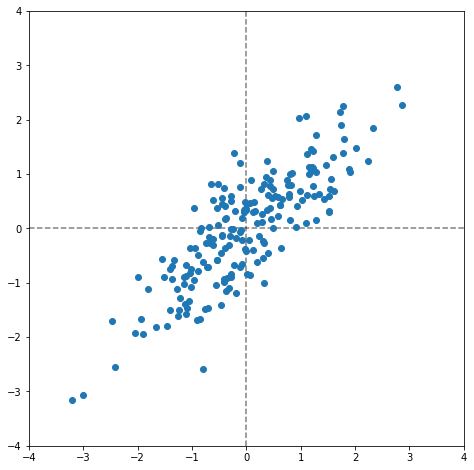

In [10]:
plt.scatter(*X)
format_plot()

## Diagonalizing the Covariance Matrix

The covariance matrix in the standard basis is $\Sigma = X X^\intercal / n$:

In [11]:
Sigma = X @ X.T / n
Sigma

array([[ 1.11868636,  0.90022225],
       [ 0.90022225,  1.04773063]])

We can compute the eigenvalues and eigenvectors of the covariance matrix using `np.linalg.eigh`:

In [12]:
eigvals, eigvecs = np.linalg.eigh(Sigma)

In [13]:
eigvals

array([ 0.18228742,  1.98412957])

In [14]:
eigvecs

array([[ 0.69304417, -0.72089512],
       [-0.72089512, -0.69304417]])

The eigenvectors are the columns of this array. They are automatically normalized and orthogonal to one another. The eigenvalues are in *increasing* order.

We can construct the matrices $Q$ and $\Sigma_U$ as seen in lecture. $Q$ is the change of basis matrix which has as its rows the eigenvectors of $\Sigma$. $\Sigma_U$ is the diagonal matrix consisting of the eigenvalues of $\Sigma$. We'll write these so that the eigenvalues are in *decreasing* order.

In [18]:
Q = eigvecs[:,::-1].T
Q

array([[-0.72089512, -0.69304417],
       [ 0.69304417, -0.72089512]])

In [19]:
Sigma_U = np.diag(eigvals[::-1])
Sigma_U

array([[ 1.98412957,  0.        ],
       [ 0.        ,  0.18228742]])

We expect to see $\Sigma = Q^\intercal \Sigma_U Q$:

In [20]:
Q.T @ Sigma_U @ Q

array([[ 1.11868636,  0.90022225],
       [ 0.90022225,  1.04773063]])

In [21]:
Sigma

array([[ 1.11868636,  0.90022225],
       [ 0.90022225,  1.04773063]])

The new coordinates are $Y = Q X$:

In [22]:
Y = Q @ X

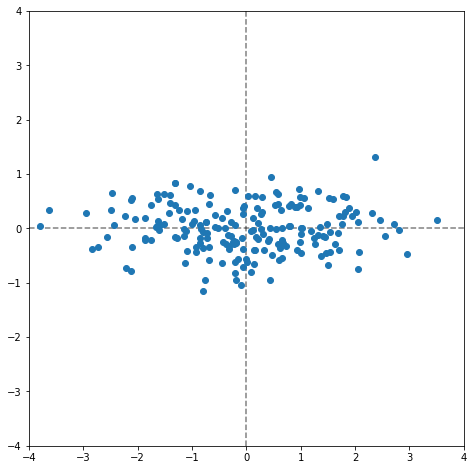

In [23]:
plt.scatter(*Y)
format_plot()

# Dimensionality Reduction

To reduce the dimensionality, we keep the top $K$ rows of $Q$:

In [24]:
Q_1 = Q[:1, :]
Y_1 = Q_1 @ X

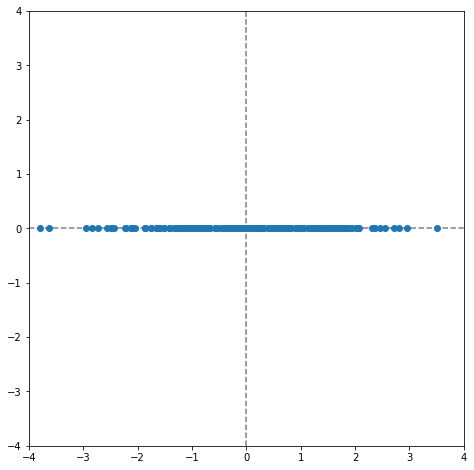

In [25]:
plt.scatter(Y_1, np.zeros_like(Y_1))
format_plot()